In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import datetime as datetime
import seaborn as sns
import matplotlib.pyplot as plt


#### **Phase - 2 Prepare**

Key tasks

    1. Download data and convert it into a Single File
    2. Identify how Data is organized.
    3. Sort and filter the data

In [2]:
sep_21= pd.read_csv("../google_data_analyst/csv/202109-divvy-tripdata.csv")
oct_21= pd.read_csv("../google_data_analyst/csv/202110-divvy-tripdata.csv")
nov_21= pd.read_csv("../google_data_analyst/csv/202111-divvy-tripdata.csv")
dec_21= pd.read_csv("../google_data_analyst/csv/202112-divvy-tripdata.csv")
jan_22= pd.read_csv("../google_data_analyst/csv/202201-divvy-tripdata.csv")
feb_22= pd.read_csv("../google_data_analyst/csv/202202-divvy-tripdata.csv")
mar_22= pd.read_csv("../google_data_analyst/csv/202203-divvy-tripdata.csv")
apr_22= pd.read_csv("../google_data_analyst/csv/202204-divvy-tripdata.csv")
may_22= pd.read_csv("../google_data_analyst/csv/202205-divvy-tripdata.csv")
june_22= pd.read_csv("../google_data_analyst/csv/202206-divvy-tripdata.csv")
july_22= pd.read_csv("../google_data_analyst/csv/202207-divvy-tripdata.csv")
aug_22= pd.read_csv("../google_data_analyst/csv/202208-divvy-tripdata.csv")

#2. Convert all csv into 1
all_csv = [ sep_21, oct_21, nov_21, dec_21, jan_22, feb_22, mar_22, apr_22, may_22, june_22, july_22, aug_22 ]
merge_all_csv= pd.concat(all_csv)

#merge_all_csv is our new file
print(merge_all_csv.head())


            ride_id  rideable_type           started_at             ended_at  \
0  9DC7B962304CBFD8  electric_bike  2021-09-28 16:07:10  2021-09-28 16:09:54   
1  F930E2C6872D6B32  electric_bike  2021-09-28 14:24:51  2021-09-28 14:40:05   
2  6EF72137900BB910  electric_bike  2021-09-28 00:20:16  2021-09-28 00:23:57   
3  78D1DE133B3DBF55  electric_bike  2021-09-28 14:51:17  2021-09-28 15:00:06   
4  E03D4ACDCAEF6E00  electric_bike  2021-09-28 09:53:12  2021-09-28 10:03:44   

  start_station_name start_station_id end_station_name end_station_id  \
0                NaN              NaN              NaN            NaN   
1                NaN              NaN              NaN            NaN   
2                NaN              NaN              NaN            NaN   
3                NaN              NaN              NaN            NaN   
4                NaN              NaN              NaN            NaN   

   start_lat  start_lng  end_lat  end_lng member_casual  
0      41.89     -87.6

In [3]:
#3. Creating csv file and saving it without index
merge_all_csv.to_csv("all_csv_merged.csv", index= False)

In [4]:
#4. Use the updated csv which we created  after merging
file_read = pd.read_csv("all_csv_merged.csv")
all_csv_data = file_read
all_csv_data.head()

,ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,member_casual
0,9DC7B962304CBFD8,electric_bike,2021-09-28 16:07:10,2021-09-28 16:09:54,NaN,NaN,NaN,NaN,41.89,-87.68,41.89,-87.67,casual
1,F930E2C6872D6B32,electric_bike,2021-09-28 14:24:51,2021-09-28 14:40:05,NaN,NaN,NaN,NaN,41.94,-87.64,41.98,-87.67,casual
2,6EF72137900BB910,electric_bike,2021-09-28 00:20:16,2021-09-28 00:23:57,NaN,NaN,NaN,NaN,41.81,-87.72,41.80,-87.72,casual
3,78D1DE133B3DBF55,electric_bike,2021-09-28 14:51:17,2021-09-28 15:00:06,NaN,NaN,NaN,NaN,41.80,-87.72,41.81,-87.72,casual
4,E03D4ACDCAEF6E00,electric_bike,2021-09-28 09:53:12,2021-09-28 10:03:44,NaN,NaN,NaN,NaN,41.88,-87.74,41.88,-87.71,casual


#### **Phase - 3 Process**

Key tasks 
1. Check the data for errors. 
2. Choose your tools. 
3. Transform the data so you can work with it effectively. 
4. Document the cleaning process.

            #Create a column called “ride_length.” Calculate the length of each ride by subtracting the
            # column “started_at” from the column “ended_at” (for example, =D2-C2) and format as HH:MM:SS using Format > Cells >
            # Time > 37:30:55.
            # Create a column called “day_of_week,” and calculate the day of the week that each ride started using the “WEEKDAY”
            # command (for example, =WEEKDAY(C2,1)) in each file. Format as General or as a number with no decimals, noting that
            # 1 = Sunday and 7 = Saturday


In [5]:

#5. Creating columns for calculation for Ride Length
all_csv_data['started_at'] = pd.to_datetime(all_csv_data['started_at'])
all_csv_data['ended_at'] = pd.to_datetime(all_csv_data['ended_at'])
all_csv_data['ride_length'] = (all_csv_data['ended_at'] - all_csv_data['started_at']).astype('timedelta64[s]').astype(np.int64)

print(all_csv_data['ride_length'])

0          164
1          914
2          221
3          529
4          632
          ... 
5883038    840
5883039    373
5883040    439
5883041    514
5883042     15
Name: ride_length, Length: 5883043, dtype: int64


#### **Creating a month column**

In [6]:
#6. Creating a month column and using dt.month to have each month stated like for january it will output 1, for feb it will show output 2, so on

all_csv_data['Month'] = all_csv_data['started_at'].dt.month
all_csv_data['Month'].head

<bound method NDFrame.head of 0          9
1          9
2          9
3          9
4          9
          ..
5883038    8
5883039    8
5883040    8
5883041    8
5883042    8
Name: Month, Length: 5883043, dtype: int64>

#### **Creating a day of week column**

In [7]:
# 7 .Create a column for 
    # Using dt.weekday to display - for Sunday to 0, Monday to 1 , Tuesday to 2, and so on.   --Mon - Sun: 0 - 6

all_csv_data['Day of Week'] = all_csv_data['started_at'].dt.weekday

all_csv_data["Day of Week"] = all_csv_data["started_at"].apply(lambda x:x.weekday())
all_csv_data["Day of Week"].unique()

#8. Creating a Dictionary with key and pair, as we want to initialize each day of week and it should be shown in output

dict={0:"sunday",1:"monday",2:"tuesday",3:"wednesday",4:"thursday",5:"friday",6:"saturday"}
all_csv_data["Day of Week"]= all_csv_data["Day of Week"].apply(lambda y: dict[y])
all_csv_data["Day of Week"]

0            monday
1            monday
2            monday
3            monday
4            monday
             ...   
5883038    thursday
5883039      sunday
5883040      monday
5883041     tuesday
5883042     tuesday
Name: Day of Week, Length: 5883043, dtype: object

#### **Creating a Time Of Day Column**

In [8]:
# 7. Create a column for Hour and store time for hour as well
all_csv_data['Hour'] = all_csv_data['started_at'].dt.hour

#8.
# Adding a new column for - Morning (6AM-12PM), Afternoon (12PM-4PM), Evening (4PM-10PM), Late Night(10PM-6AM)

def time_of_day(hour):
    if 6 <= hour < 12:
      return 'Morning'
    elif 12 <= hour < 16:
      return 'Afternoon'
    elif 16 <= hour < 20:
      return 'Evening'
    else: 
      return 'Late Night'

all_csv_data['Time of Day'] = all_csv_data['Hour']
all_csv_data['Time of Day'] = all_csv_data['Time of Day'].apply(time_of_day)

#### **Check for NULL VALUES**

In [9]:
#9.Check for null values
all_csv_data.info(verbose=True, null_counts=True)

/var/folders/dq/r8br76_96rs7bnfkcjxrblg40000gn/T/ipykernel_27556/1746811259.py:2: FutureWarning: null_counts is deprecated. Use show_counts instead
  all_csv_data.info(verbose=True, null_counts=True)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5883043 entries, 0 to 5883042
Data columns (total 18 columns):
 #   Column              Non-Null Count    Dtype         
---  ------              --------------    -----         
 0   ride_id             5883043 non-null  object        
 1   rideable_type       5883043 non-null  object        
 2   started_at          5883043 non-null  datetime64[ns]
 3   ended_at            5883043 non-null  datetime64[ns]
 4   start_station_name  4998678 non-null  object        
 5   start_station_id    4998680 non-null  object        
 6   end_station_name    4936740 non-null  object        
 7   end_station_id      4936740 non-null  object        
 8   start_lat           5883043 non-null  float64       
 9   start_lng           5883043 non-null  float64       
 10  end_lat             5877316 non-null  float64       
 11  end_lng             5877316 non-null  float64       
 12  member_casual       5883043 non-null  object        
 13  ride_length 

#### **CHECKING FOR DUPLICATES**

In [10]:
#10. check for rows having duplicate values or not
all_csv_data.duplicated().sum()
print( "Sum Of Duplicates in our overall data : - " + str(all_csv_data.duplicated().sum()) )

#11. To check duplicate values in "ride_id" column
all_csv_data.ride_id.duplicated().sum()
print( "Sum Of Duplicates in Ride ID : - " + str(all_csv_data.ride_id.duplicated().sum()))

#12.removing duplicates from ride_id, below query gives output which are duplicate

print("Removung all the duplicates if any and if any of duplicates still remains we will get output for the same: - ")
all_csv_data.loc[all_csv_data.ride_id.duplicated(keep=False), :].sort_values('ride_id').head(6)

Sum Of Duplicates in our overall data : - 0
Sum Of Duplicates in Ride ID : - 0
Removung all the duplicates if any and if any of duplicates still remains we will get output for the same: - 


,ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,member_casual,ride_length,Month,Day of Week,Hour,Time of Day


#### **Creating a new  variable - csv_file_cleaned - Checking how many Duplicates and Negative are there in ride_length**

In [11]:
#13. Find/drop all rows that are duplicates AND Negative 'ride_length'
csv_file_cleaned = all_csv_data.drop(all_csv_data.loc[(all_csv_data.ride_id.duplicated(keep=False)) & (all_csv_data['ride_length'] < 0) , :].index)


#### **After Checking for Negative Values, removing Negative Values in ride_length**

In [12]:
#14. Checking for ride_length for negative values

csv_file_cleaned.loc[csv_file_cleaned['ride_length'] < 0, 'ride_length'].count()
print( "Checking for ride_length for negative values: - " + str(csv_file_cleaned.loc[csv_file_cleaned['ride_length'] < 0, 'ride_length'].count()))

#15. remove rows with 'ride_length'
csv_file_cleaned.drop(csv_file_cleaned.loc[csv_file_cleaned['ride_length'] < 0, :].index, inplace=True)
print( "Removes rows with negative values: - "+ str(csv_file_cleaned.drop(csv_file_cleaned.loc[csv_file_cleaned['ride_length'] < 0, :].index, inplace=True)))

#16. After removing rows in negative
csv_file_cleaned.loc[csv_file_cleaned['ride_length'] < 0, 'ride_length'].count()
print( "Cont After removing negative values in ride_length  : - "+ str(csv_file_cleaned.loc[csv_file_cleaned['ride_length'] < 0, 'ride_length'].count()))


Checking for ride_length for negative values: - 135
Removes rows with negative values: - None
Cont After removing negative values in ride_length  : - 0


#### **Outliers ride_length**

In [13]:
#17. Outliers (Ride Duration [ ride_length ])

Q1 = csv_file_cleaned['ride_length'].quantile(0.25)
Q3 = csv_file_cleaned['ride_length'].quantile(0.75)
IQR = Q3 - Q1
Upper_OL = (Q3 + (1.5 * IQR))
Lower_OL = (Q1 - (1.5 * IQR))

#Lower_OL is in negatives, doesn't apply

csv_file_cleaned.drop(csv_file_cleaned.loc[csv_file_cleaned['ride_length'] > Upper_OL, 'ride_length'].index, inplace=True)

In [14]:
# Data Analysis - Summary Statistics

csv_file_cleaned.info(verbose=True, null_counts=True)

/var/folders/dq/r8br76_96rs7bnfkcjxrblg40000gn/T/ipykernel_27556/1937191227.py:3: FutureWarning: null_counts is deprecated. Use show_counts instead
  csv_file_cleaned.info(verbose=True, null_counts=True)


<class 'pandas.core.frame.DataFrame'>
Int64Index: 5456210 entries, 0 to 5883042
Data columns (total 18 columns):
 #   Column              Non-Null Count    Dtype         
---  ------              --------------    -----         
 0   ride_id             5456210 non-null  object        
 1   rideable_type       5456210 non-null  object        
 2   started_at          5456210 non-null  datetime64[ns]
 3   ended_at            5456210 non-null  datetime64[ns]
 4   start_station_name  4611980 non-null  object        
 5   start_station_id    4611982 non-null  object        
 6   end_station_name    4566633 non-null  object        
 7   end_station_id      4566633 non-null  object        
 8   start_lat           5456210 non-null  float64       
 9   start_lng           5456210 non-null  float64       
 10  end_lat             5455930 non-null  float64       
 11  end_lng             5455930 non-null  float64       
 12  member_casual       5456210 non-null  object        
 13  ride_length 

In [15]:
#18. Describe content which has datatype as object
csv_file_cleaned.describe(include='object')


,ride_id,rideable_type,start_station_name,start_station_id,end_station_name,end_station_id,member_casual,Day of Week,Time of Day
count,5456210,5456210,4611980,4611982,4566633,4566633,5456210,5456210,5456210
unique,5456210,3,1423,1263,1441,1273,2,7,4
top,9DC7B962304CBFD8,classic_bike,Streeter Dr & Grand Ave,13022,Streeter Dr & Grand Ave,13022,member,friday,Evening
freq,1,2683541,59072,59072,57252,57252,3315886,864410,1827642


In [16]:
#19. Describe ride_length column
csv_file_cleaned['ride_length'].describe()


count    5.456210e+06
mean     7.341912e+02
std      5.135190e+02
min      0.000000e+00
25%      3.460000e+02
50%      5.960000e+02
75%      1.003000e+03
max      2.355000e+03
Name: ride_length, dtype: float64

Ride 

In [17]:
#20. Ride Count Analysis
# Total Ride Count, member and casual user

total_ride_count = csv_file_cleaned['ride_id'].count()
print("Total Ride count: - " + str(total_ride_count))

#Member and Casual USER Ride Count
member_ride_count = csv_file_cleaned.groupby('member_casual')['ride_id'].count().reset_index()
member_ride_count['Percentile (%)'] = member_ride_count['ride_id']/total_ride_count*100
print("Total Ride count: - ")
print(member_ride_count)


Total Ride count: - 5456210
Total Ride count: - 
  member_casual  ride_id  Percentile (%)
0        casual  2140324       39.227302
1        member  3315886       60.772698


In [18]:
#21. Ride Count for member and Casual user as per Bike Ride TYPE

member_casual_user_biketype = csv_file_cleaned.groupby(['member_casual', 'rideable_type'])['ride_id'].count().reset_index()
member_casual_user_biketype['Percentile (%)'] = member_casual_user_biketype['ride_id']/total_ride_count*100
print("As per Bike Ride type count for member and casual user: -")
member_casual_user_biketype



As per Bike Ride type count for member and casual user: -


,member_casual,rideable_type,ride_id,Percentile (%)
0,casual,classic_bike,877838,16.088787
1,casual,docked_bike,134752,2.469700
2,casual,electric_bike,1127734,20.668816
3,member,classic_bike,1805703,33.094456
4,member,electric_bike,1510183,27.678242


In [19]:
#22. Ride Count of member and casual user by Day time

day_time_count = csv_file_cleaned.groupby(['member_casual', 'Time of Day'])['ride_id'].count().reset_index()
day_time_count['Percentile (%)'] = day_time_count['ride_id']/total_ride_count*100
print("As per Day Time count of  member and casual user: -")
day_time_count


As per Day Time count of  member and casual user: -


,member_casual,Time of Day,ride_id,Percentile (%)
0,casual,Afternoon,556171,10.193358
1,casual,Evening,711390,13.038171
2,casual,Late Night,472369,8.657456
3,casual,Morning,400394,7.338317
4,member,Afternoon,771261,14.135471
5,member,Evening,1116252,20.458377
6,member,Late Night,518254,9.498425
7,member,Morning,910119,16.680425


In [20]:
#23. Ride Count of member and casual user as per week of day

week_of_day_count = csv_file_cleaned.groupby(['member_casual', 'Day of Week'])['ride_id'].count().reset_index()
week_of_day_count['Percentile (%)'] = week_of_day_count['ride_id']/total_ride_count*100
print("As per week of Day count of member and casual user: -")
week_of_day_count

As per week of Day count of member and casual user: -


,member_casual,Day of Week,ride_id,Percentile (%)
0,casual,friday,428734,7.857725
1,casual,monday,248773,4.559447
2,casual,saturday,363092,6.654656
3,casual,sunday,250288,4.587213
4,casual,thursday,306298,5.613750
5,casual,tuesday,264114,4.840613
6,casual,wednesday,279025,5.113898
7,member,friday,435676,7.984957
8,member,monday,524447,9.611928
9,member,saturday,387112,7.094888


In [21]:
#24. Ride Count of member and casual user as per hourss

hour_member_casual = csv_file_cleaned.groupby(['member_casual', 'Hour'])['ride_id'].count().reset_index()
hour_member_casual['%'] = hour_member_casual['ride_id']/total_ride_count*100
print("As per Hour count of member and casual user: -")
hour_member_casual

As per Hour count of member and casual user: -


,member_casual,Hour,ride_id,%
0,casual,0,45228,0.828927
1,casual,1,29776,0.545727
2,casual,2,18797,0.344507
3,casual,3,11083,0.203126
4,casual,4,8075,0.147997
5,casual,5,12350,0.226348
6,casual,6,27223,0.498936
7,casual,7,49844,0.913528
8,casual,8,64929,1.190002
9,casual,9,66813,1.224531


In [22]:
#25. Ride Count of member and casual user as per month

month_member_casual = csv_file_cleaned.groupby(['member_casual', 'Month'])['ride_id'].count().reset_index()
month_member_casual['Percentile (%)'] = month_member_casual['ride_id']/total_ride_count*100
print("As per Hour count of member and casual user: -")

month_member_casual


As per Hour count of member and casual user: -


,member_casual,Month,ride_id,Percentile (%)
0,casual,1,17357,0.318115
1,casual,2,19556,0.358417
2,casual,3,76904,1.409477
3,casual,4,109307,2.003350
4,casual,5,235332,4.313104
5,casual,6,319042,5.847319
6,casual,7,350002,6.414746
7,casual,8,315858,5.788963
8,casual,9,309542,5.673205
9,casual,10,225250,4.128324


#### **Phase - 4 Analyze**
    Key tasks
    
        1. Aggregate your data so it’s useful and accessible.
        2. Organize and format your data.
        3. Perform calculations.
        4. Identify trends and relationships.
            ● Calculate the mean of ride_length
            ● Calculate the max ride_length
            ● Calculate the mode of day_of_week
              

#### **Member Type - Average Mean ride_length**

In [23]:
#26. Ride Duration Analysis - 

#  4. Identify trends and relationships.
              # A] Calculate the mean of ride_length
              # B] Calculate the mode of day_of_week

# 4] A] Calculate the mean of ride_length

# Average Mean Ride Duration by Member Casual

avg_member_casual_ride = csv_file_cleaned.groupby('member_casual')['ride_length'].mean().reset_index()
avg_member_casual_ride['ride_length (min)'] = avg_member_casual_ride['ride_length']/60
print("Average Mean ride_length count of member and casual user: -")

avg_member_casual_ride

Average Mean ride_length count of member and casual user: -


,member_casual,ride_length,ride_length (min)
0,casual,849.993404,14.166557
1,member,659.443645,10.990727


    We can see Casual User's Ride Duration [i.e Ride Length] is more than Member
        Casual User Ride Duration = 14.166557 mins
        Member Ride Duration = 10.990727 mins

#### **Bike Type - Average Mean ride_length**

In [24]:
#27. Average Mean ride_length of member and casual user by Bike Type

avg_bike_type_member_casual_ride = csv_file_cleaned.groupby(['member_casual', 'rideable_type'])['ride_length'].mean().reset_index()
avg_bike_type_member_casual_ride['ride_length (min)'] = avg_bike_type_member_casual_ride['ride_length']/60
print("Average Bike Type Mean ride_length count for member and casual user: -")
avg_bike_type_member_casual_ride

Average Bike Type Mean ride_length count for member and casual user: -


,member_casual,rideable_type,ride_length,ride_length (min)
0,casual,classic_bike,890.655056,14.844251
1,casual,docked_bike,1191.221948,19.853699
2,casual,electric_bike,777.568903,12.959482
3,member,classic_bike,691.694126,11.528235
4,member,electric_bike,620.882231,10.348037


 **Both Annual Members and Casual riders use classic-bikes and electric-bikes.Casual Rider prefers docked_bike, whereas Annual member never use docked-bike**

#### **Time Of Day - Average Mean ride_length**

In [25]:
# 28. Average Ride Duration for Member and Casual user by day time

avg_day_time_member_casual_ride = csv_file_cleaned.groupby(['member_casual', 'Time of Day'])['ride_length'].mean().reset_index()
avg_day_time_member_casual_ride['ride_length (min)'] = avg_day_time_member_casual_ride['ride_length']/60
print("Average Bike Ride by day time count for member and casual user: -")
avg_day_time_member_casual_ride

Average Bike Ride by day time count for member and casual user: -


,member_casual,Time of Day,ride_length,ride_length (min)
0,casual,Afternoon,912.331368,15.205523
1,casual,Evening,866.428347,14.440472
2,casual,Late Night,794.389767,13.239829
3,casual,Morning,799.800874,13.330015
4,member,Afternoon,656.048095,10.934135
5,member,Evening,689.403496,11.490058
6,member,Late Night,650.781082,10.846351
7,member,Morning,630.508439,10.508474


**Casual Member travels highest in Afternoon whereas Annual Member travels more in Evening**

#### **Day Of Week - Average Mean ride_length**

In [26]:
# 29. Average Ride Duration for Member and Casual user by day of the week

avg_day_of_week_member_casual_ride = csv_file_cleaned.groupby(['member_casual', 'Day of Week'])['ride_length'].mean().reset_index()
avg_day_of_week_member_casual_ride['ride_length (min)'] = avg_day_of_week_member_casual_ride['ride_length']/60
print("Average Bike Ride by day of week count for member and casual user: -")
avg_day_of_week_member_casual_ride

Average Bike Ride by day of week count for member and casual user: -


,member_casual,Day of Week,ride_length,ride_length (min)
0,casual,friday,913.453668,15.224228
1,casual,monday,789.992543,13.166542
2,casual,saturday,917.138563,15.285643
3,casual,sunday,842.553007,14.042550
4,casual,thursday,831.773378,13.862890
5,casual,tuesday,791.692428,13.194874
6,casual,wednesday,800.464704,13.341078
7,member,friday,713.802181,11.896703
8,member,monday,634.993393,10.583223
9,member,saturday,707.842211,11.797370


#### **Monthwise - Average Mean ride_length**

In [27]:
# 30. Average Ride Duration for Member and Casual user by month

avg_month_member_casual_ride = csv_file_cleaned.groupby(['member_casual', 'Month'])['ride_length'].mean().reset_index()
avg_month_member_casual_ride['ride_length (min)'] = avg_month_member_casual_ride['ride_length']/60
print("Average Bike Ride by month for member and casual user: -")
avg_month_member_casual_ride

Average Bike Ride by month for member and casual user: -


,member_casual,Month,ride_length,ride_length (min)
0,casual,1,705.618367,11.760306
1,casual,2,740.047198,12.334120
2,casual,3,860.555108,14.342585
3,casual,4,848.212704,14.136878
4,casual,5,888.092057,14.801534
5,casual,6,864.026031,14.400434
6,casual,7,848.231536,14.137192
7,casual,8,813.387506,13.556458
8,casual,9,906.121638,15.102027
9,casual,10,851.630309,14.193838


#### **Hourwise - Average Mean ride_length**

In [28]:
# 31. Average Ride Duration for Member and Casual user by Hour

avg_hour_member_casual_ride = csv_file_cleaned.groupby(['member_casual', 'Hour'])['ride_length'].mean().reset_index()
avg_hour_member_casual_ride['ride_length (min)'] = avg_hour_member_casual_ride['ride_length']/60
print("Average Bike Ride by Hour for member and casual user: -")
avg_hour_member_casual_ride


Average Bike Ride by Hour for member and casual user: -


,member_casual,Hour,ride_length,ride_length (min)
0,casual,0,765.943110,12.765719
1,casual,1,766.678802,12.777980
2,casual,2,781.169921,13.019499
3,casual,3,778.030768,12.967179
4,casual,4,739.636904,12.327282
5,casual,5,663.582024,11.059700
6,casual,6,656.889358,10.948156
7,casual,7,686.833480,11.447225
8,casual,8,720.535785,12.008930
9,casual,9,794.501549,13.241692


## **4. B] Calculate the mode of day_of_week**

In [29]:
#mode of weekday for members
member_md_weekday = csv_file_cleaned[csv_file_cleaned["member_casual"]=="member"]
member_md_weekday = member_md_weekday["Day of Week"].mode()
print("Mode of Annual members is: - " + str(member_md_weekday))

#mode of weekday for casual 
casual_md_weekday = csv_file_cleaned[csv_file_cleaned["member_casual"]=="casual"]
casual_md_weekday = casual_md_weekday["Day of Week"].mode()
print("Mode of all Casual user is: - " + str(casual_md_weekday))

Mode of Annual members is: - 0    tuesday
Name: Day of Week, dtype: object
Mode of all Casual user is: - 0    friday
Name: Day of Week, dtype: object


**As we can see that the mode of weekday for Annual members is "Tuesday"  and Casual riders is "Friday".**

## **Top 10 start Station**

In [30]:
# 32. Top 10 start Station
start_station_ovr = csv_file_cleaned.groupby('start_station_name')['ride_id'].count().reset_index().sort_values('ride_id', ascending=False)
start_station_ovr['Percentile (%)'] = start_station_ovr['ride_id']/total_ride_count*100
start_station_ovr.head(10)

,start_station_name,ride_id,Percentile (%)
1263,Streeter Dr & Grand Ave,59072,1.082656
1333,Wells St & Concord Ln,39430,0.722663
347,DuSable Lake Shore Dr & North Blvd,37466,0.686667
234,Clark St & Elm St,36158,0.662694
596,Kingsbury St & Kinzie St,34796,0.637732
1334,Wells St & Elm St,33527,0.614474
774,Michigan Ave & Oak St,32598,0.597448
346,DuSable Lake Shore Dr & Monroe St,31212,0.572045
1268,Theater on the Lake,29705,0.544426
228,Clark St & Armitage Ave,29029,0.532036


## **Top 10 End Station**

In [31]:
# 32. Top 10 End Station

end_station_ovr = csv_file_cleaned.groupby('end_station_name')['ride_id'].count().reset_index().sort_values('ride_id', ascending=False)
end_station_ovr['Percentile (%)'] = end_station_ovr['ride_id']/total_ride_count*100
end_station_ovr.head(10)

,end_station_name,ride_id,Percentile (%)
1283,Streeter Dr & Grand Ave,57252,1.049300
1353,Wells St & Concord Ln,39457,0.723158
352,DuSable Lake Shore Dr & North Blvd,38710,0.709467
238,Clark St & Elm St,35801,0.656151
601,Kingsbury St & Kinzie St,33655,0.616820
1354,Wells St & Elm St,32657,0.598529
782,Michigan Ave & Oak St,31940,0.585388
109,Broadway & Barry Ave,29536,0.541328
351,DuSable Lake Shore Dr & Monroe St,29331,0.537571
232,Clark St & Armitage Ave,28866,0.529049


## **Top 10 Start Station for Annual Member and Casual User**

In [32]:
# 33. Top 10 start Station for member and casual user

member_casual_start_station = csv_file_cleaned.groupby(['member_casual', 'start_station_name'])['ride_id'].count().reset_index()
member_casual_start_station['Percentile (%)'] = member_casual_start_station['ride_id']/total_ride_count*100
member_casual_start_station.sort_values(['member_casual', 'ride_id'], ascending=False).groupby('member_casual').head(10)

,member_casual,start_station_name,ride_id,Percentile (%)
1931,member,Kingsbury St & Kinzie St,26219,0.480535
1593,member,Clark St & Elm St,22962,0.420842
2593,member,Wells St & Concord Ln,22728,0.416553
2594,member,Wells St & Elm St,20066,0.367764
1724,member,Ellis Ave & 60th St,19870,0.364172
1616,member,Clinton St & Madison St,19570,0.358674
2552,member,University Ave & 57th St,19462,0.356694
1620,member,Clinton St & Washington Blvd,19442,0.356328
2597,member,Wells St & Huron St,18008,0.330046
1683,member,Dearborn St & Erie St,17647,0.323430


## **Top 10 End Station for Annual Member and Casual User**

In [33]:
# 34. Top 10 end Station for member and casual user

member_casual_end_station = csv_file_cleaned.groupby(['member_casual', 'end_station_name'])['ride_id'].count().reset_index()
member_casual_end_station['Percentile (%)'] = member_casual_end_station['ride_id']/total_ride_count*100
member_casual_end_station.sort_values(['member_casual', 'ride_id'], ascending=False).groupby('member_casual').head(10)

,member_casual,end_station_name,ride_id,Percentile (%)
1952,member,Kingsbury St & Kinzie St,25866,0.474065
1615,member,Clark St & Elm St,23439,0.429584
2608,member,Wells St & Concord Ln,23378,0.428466
1642,member,Clinton St & Washington Blvd,20339,0.372768
2567,member,University Ave & 57th St,20299,0.372035
1638,member,Clinton St & Madison St,20179,0.369835
2609,member,Wells St & Elm St,20050,0.367471
1745,member,Ellis Ave & 60th St,19355,0.354733
1494,member,Broadway & Barry Ave,18133,0.332337
2511,member,St. Clair St & Erie St,18113,0.331970


#### **Creating Final CSV File After Removung NULL, Duplicate and Negative Values and Adding ride_length, Month and so on**

In [34]:
# 31. Converting to csv file 
csv_file_cleaned.to_csv('Cyclistic_bike_share_DV.csv')

# **Phase - 5** 
    # Key tasks
         1. Determine the best way to share your findings.
         2. Create effective data visualizations.
         3. Present your findings.
         4. Ensure your work is accessible.
            Create your data visualization, remembering that contrast should be used to draw your audience’s attention to 
            the most important insights. Use artistic principles including size, color, and shape.
            Ensure clear meaning through the proper use of common elements, such as headlines, subtitles, and labels.
            Refine your data visualization by applying deep attention to detail

In [36]:
csv_file_cleaned.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 5456210 entries, 0 to 5883042
Data columns (total 18 columns):
 #   Column              Dtype         
---  ------              -----         
 0   ride_id             object        
 1   rideable_type       object        
 2   started_at          datetime64[ns]
 3   ended_at            datetime64[ns]
 4   start_station_name  object        
 5   start_station_id    object        
 6   end_station_name    object        
 7   end_station_id      object        
 8   start_lat           float64       
 9   start_lng           float64       
 10  end_lat             float64       
 11  end_lng             float64       
 12  member_casual       object        
 13  ride_length         int64         
 14  Month               int64         
 15  Day of Week         object        
 16  Hour                int64         
 17  Time of Day         object        
dtypes: datetime64[ns](2), float64(4), int64(3), object(9)
memory usage: 790.9+ MB


#### **Selecting Only important columns for Visualization**

In [37]:
final_csv_file = csv_file_cleaned[["ride_id","rideable_type","started_at","ended_at","start_station_name","end_station_name","member_casual","ride_length","Month","Day of Week", "Hour", "Time of Day"]]
final_csv_file.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5456210 entries, 0 to 5883042
Data columns (total 12 columns):
 #   Column              Dtype         
---  ------              -----         
 0   ride_id             object        
 1   rideable_type       object        
 2   started_at          datetime64[ns]
 3   ended_at            datetime64[ns]
 4   start_station_name  object        
 5   end_station_name    object        
 6   member_casual       object        
 7   ride_length         int64         
 8   Month               int64         
 9   Day of Week         object        
 10  Hour                int64         
 11  Time of Day         object        
dtypes: datetime64[ns](2), int64(3), object(7)
memory usage: 541.2+ MB


#### **Creating a Final CSV File For Visualization In Tableau**

In [38]:
final_csv_file.to_csv('Final_Cleaned_Cyclistic_bike_share_DV.csv')

#### **Pie Chart of Annual Member and Casual**

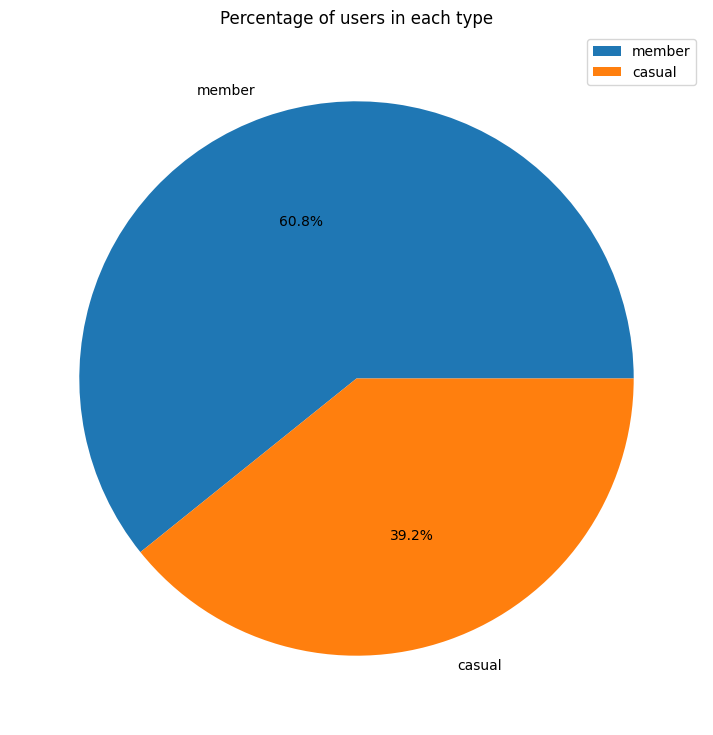

In [39]:
#To check the number of users in each type over past 12 months 
member_type = final_csv_file["member_casual"].value_counts()
member_type

#To plot the pie chart of users in each type
plt.figure(figsize=(11,9))
plt.pie(member_type.values,labels = member_type.index, autopct = "%1.1f%%")
plt.title("Percentage of users in each type")
plt.legend(member_type.index)
plt.show()

In [40]:
#To check the number of users in each type over past 12 months 
member_type = final_csv_file["member_casual"].value_counts()
member_type

member    3315886
casual    2140324
Name: member_casual, dtype: int64

Text(0, 0.5, 'Ride Count')

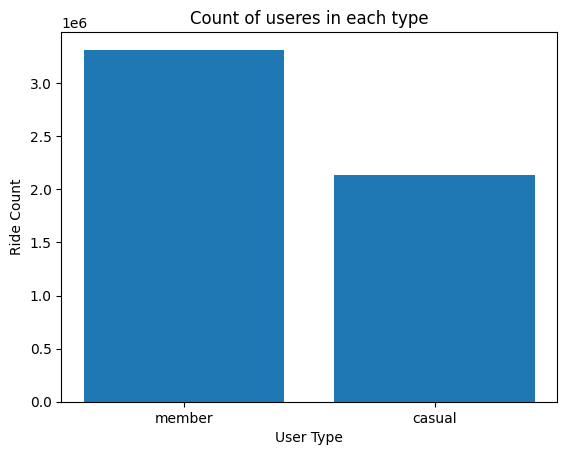

In [51]:
#To plot the count of users in each type

plt.title("Count of useres in each type")
plt.bar(member_type.index, member_type.values)
plt.xlabel("User Type")
plt.ylabel("Ride Count")


## **Calculating the average ride length for members and casual riders by weekday**

In [52]:
# Calculating the ride length for members  by weekday.
ridelength_member = final_csv_file[final_csv_file["member_casual"]=="member"].groupby("Day of Week")["ride_length"].mean(numeric_only=False)
ridelength_member

Day of Week
friday       713.802181
monday       634.993393
saturday     707.842211
sunday       642.538268
thursday     650.595384
tuesday      641.667980
wednesday    643.410603
Name: ride_length, dtype: float64

In [53]:
# Calculating the ride length for casual by weekday.
ridelength_casual = final_csv_file[final_csv_file["member_casual"]=="casual"].groupby("Day of Week")["ride_length"].mean(numeric_only=False)
ridelength_casual

Day of Week
friday       913.453668
monday       789.992543
saturday     917.138563
sunday       842.553007
thursday     831.773378
tuesday      791.692428
wednesday    800.464704
Name: ride_length, dtype: float64

## **Plot a Line Graph for Ride Length vs Weekday**

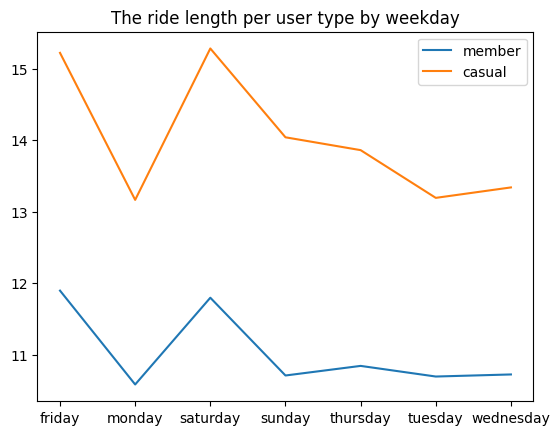

In [54]:

plt.plot(ridelength_member/60)
plt.plot(ridelength_casual/60)
plt.title("The ride length per user type by weekday")
plt.legend(["member","casual"])
plt.show()

## 
**-> The highest average ride length for casual riders is observed on Saturday which is approximately 15 minutes.**

**-> The highest average ride length for casual riders is observed on Friday which is approximately 12 minutes.**

## **Calculate the number of rides for all types annual members and casual riders per ride count**

In [55]:

#calculate number of rides for members by weekday by adding count of ride_id to values
member_weekday_cnt = final_csv_file[final_csv_file["member_casual"]=="member"].groupby("Day of Week")["ride_id"].count()
member_weekday_cnt = member_weekday_cnt.sort_index()
member_weekday_cnt


Day of Week
friday       435676
monday       524447
saturday     387112
sunday       461950
thursday     459599
tuesday      534363
wednesday    512739
Name: ride_id, dtype: int64

In [56]:
#calculate number of rides for casual by weekday by adding count of ride_id to values
casual_weekday_cnt = final_csv_file[final_csv_file["member_casual"]=="casual"].groupby("Day of Week")["ride_id"].count()
casual_weekday_cnt = casual_weekday_cnt.sort_index()
casual_weekday_cnt

Day of Week
friday       428734
monday       248773
saturday     363092
sunday       250288
thursday     306298
tuesday      264114
wednesday    279025
Name: ride_id, dtype: int64

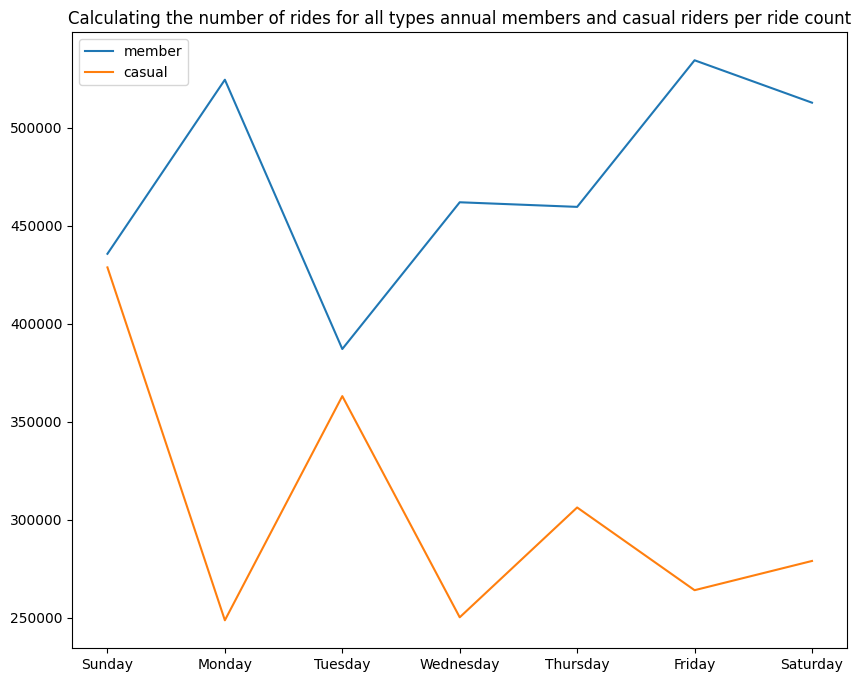

In [57]:
plt.figure(figsize =(10,8))

plt.plot(member_weekday_cnt.index,member_weekday_cnt.values)
plt.plot(casual_weekday_cnt.index,casual_weekday_cnt.values)
plt.title("Calculating the number of rides for all types annual members and casual riders per ride count")
plt.legend(["member","casual"])
labels = ["Sunday","Monday","Tuesday","Wednesday","Thursday","Friday","Saturday"]
plt.xticks(casual_weekday_cnt.index,labels)
plt.show()

#### 
**-> The maximum number of rides for casual riders was on Sunday and lowest was recorded on Sunday.**

**-> The maximum number of rides for annual members was on Thursday and lowest was recorded on Friday.**
